<a href="https://colab.research.google.com/github/Shah03-rgb/diya_bati_ss/blob/main/Shahid_DTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-bcd54c8e5964>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].apply(pd.to_numeric, errors='coerce')
<ipython-input-10-bcd54c8e5964>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
<ipython-input-10-bcd54c8e5964>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

MAE: 6.81 years
MSE: 74.59
R² Score: -0.01


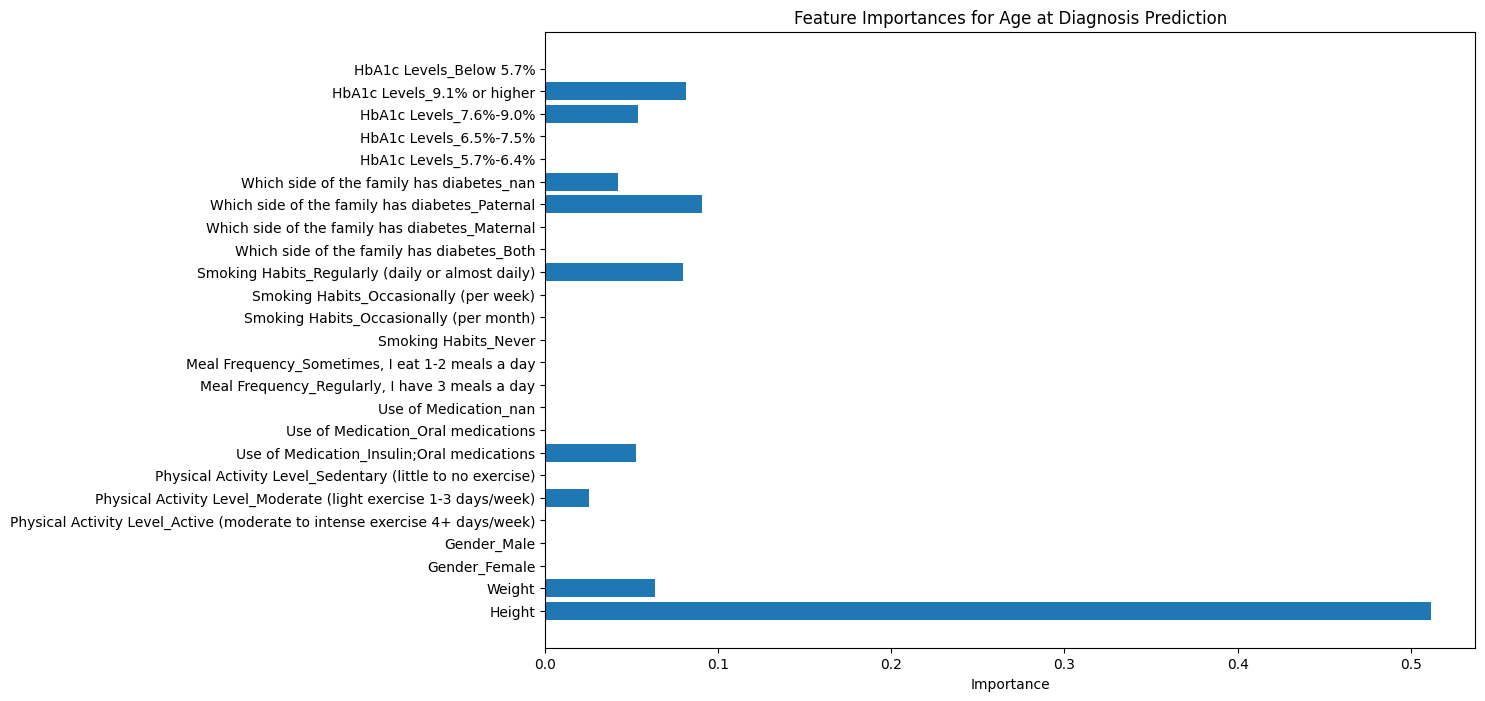

In [10]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('Diabetic_expandeddataset.xlsx')

# Convert Age at Diagnosis to numerical mean
def convert_age_range(age_range):
    if pd.isna(age_range):
        return np.nan
    if '-' in age_range:
        lower, upper = map(int, age_range.split('-'))
        return (lower + upper) / 2
    elif 'or older' in age_range:
        return int(age_range.split()[0]) + 5  # 55 or older → 60
    else:
        return float(age_range)

# Create target variable
df['Age_at_Diagnosis_Mean'] = df['Age at Diagnosis'].apply(convert_age_range)
df = df.dropna(subset=['Age_at_Diagnosis_Mean'])

# Feature selection with verified column names
features = [
    'Gender',
    'Height',
    'Weight',
    'Physical Activity Level',
    'Use of Medication',
    'Meal Frequency',
    'Smoking Habits',
    'Which side of the family has diabetes',
    'HbA1c Levels'
]

# Check for missing columns
missing_cols = [col for col in features if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

X = df[features]
y = df['Age_at_Diagnosis_Mean']

# Data preprocessing
# Convert numerical features
numerical_features = ['Height', 'Weight']
X[numerical_features] = X[numerical_features].apply(pd.to_numeric, errors='coerce')

# Handle missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

# Convert categorical features to strings
categorical_features = [
    'Gender',
    'Physical Activity Level',
    'Use of Medication',
    'Meal Frequency',
    'Smoking Habits',
    'Which side of the family has diabetes',
    'HbA1c Levels'
]

X[categorical_features] = X[categorical_features].astype(str)
X[categorical_features] = X[categorical_features].fillna('Missing')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train model
model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train_processed, y_train)

# Evaluate
y_pred = model.predict(X_test_processed)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} years")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Feature importance
feature_names = numerical_features + list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)

plt.figure(figsize=(12, 8))
plt.barh(feature_names, model.feature_importances_)
plt.xlabel('Importance')
plt.title('Feature Importances for Age at Diagnosis Prediction')
plt.show()